In [1]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
# put channel dimension last for tensorflow backend

In [4]:
if keras.backend.backend() == "tensorflow":
    channel_axis= 3
else:
    channel_axis = 1

In [5]:
X_train = np.expand_dims(X_train,axis=channel_axis) / 255.

X_test = np.expand_dims(X_test,axis=channel_axis) / 255.

In [6]:
from keras.models import Model

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Input,Activation, Flatten

In [8]:
inp = Input(shape=X_train.shape[1:])

In [9]:
num_layers = 2

In [10]:
x = inp
for _ in range(num_layers):
    
    x = Conv2D(64,(3,3),padding="same",activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

In [11]:
x = Conv2D(64,(3,3),padding="same", activation="relu")(x)

In [12]:
x = Flatten()(x)

In [13]:
x= Dense(128,activation="relu")(x)
pred = Dense(10,activation="relu")(x)


In [14]:
model = Model(inputs=inp, outputs=pred)

In [15]:
adam = keras.optimizers.Adam(lr=0.0001)

In [16]:
model.compile(optimizer=adam,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(X_train[:1000],y_train[:1000], batch_size=128,epochs=4 )

Epoch 1/4
1000/1000 [==============================] - 1s - loss: 4.0695 - acc: 0.2010     
Epoch 2/4
1000/1000 [==============================] - 0s - loss: 2.9654 - acc: 0.4040     
Epoch 3/4
1000/1000 [==============================] - 0s - loss: 2.6736 - acc: 0.5390     
Epoch 4/4
1000/1000 [==============================] - 0s - loss: 2.2469 - acc: 0.7080     


In [18]:
model.evaluate(X_test[:1000], y_test[:1000])[1]

 992/1000 [============================>.] - ETA: 0s

0.65100000000000002

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

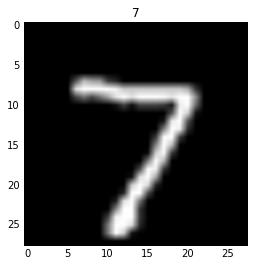

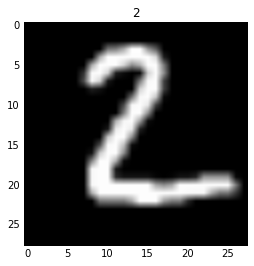

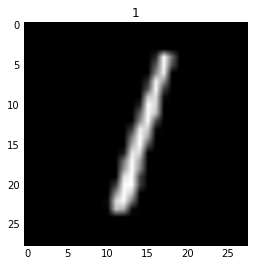

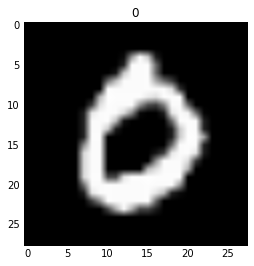

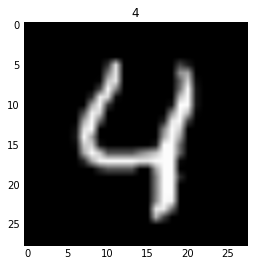

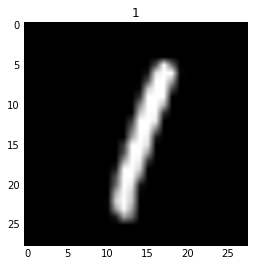

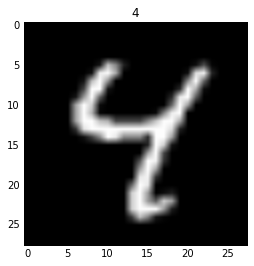

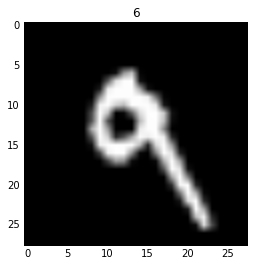

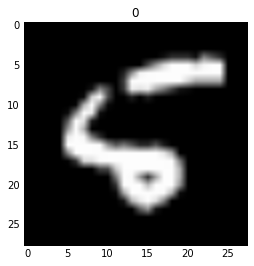

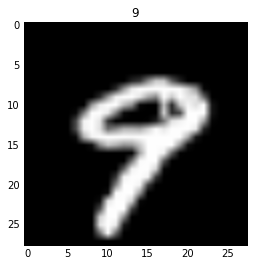

In [20]:
predictions = model.predict(X_test[:20])

for i,prediction in enumerate(predictions[:10]):
    plt.figure(i)   
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(np.argmax(prediction))